In [1]:
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('processed_data.csv')

df = df.reset_index(drop=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             50000 non-null  int64  
 1   num_passengers         50000 non-null  int64  
 2   sales_channel          50000 non-null  object 
 3   trip_type              50000 non-null  object 
 4   purchase_lead          50000 non-null  int64  
 5   length_of_stay         50000 non-null  int64  
 6   flight_hour            50000 non-null  int64  
 7   flight_day             50000 non-null  int64  
 8   route                  50000 non-null  object 
 9   booking_origin         50000 non-null  object 
 10  wants_extra_baggage    50000 non-null  int64  
 11  wants_preferred_seat   50000 non-null  int64  
 12  wants_in_flight_meals  50000 non-null  int64  
 13  flight_duration        50000 non-null  float64
 14  booking_complete       50000 non-null  int64  
 15  le

In [4]:
df.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [5]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,lead_time_category,booking_yes
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,Long Lead Time,False
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,Long Lead Time,False
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,Long Lead Time,False
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,Long Lead Time,False
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,Long Lead Time,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0,Medium Lead Time,False
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0,Long Lead Time,False
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0,Medium Lead Time,False
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0,Medium Lead Time,False


In [6]:
df_copy = df

In [7]:
from sklearn.preprocessing import OneHotEncoder


#create instance of one hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#one hot encode Sales Channel
encoder_df = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'Internet', 1:'Mobile'})
df_copy = df_copy.join(encoder_df)

#one hot encode trip type
encoder_df = pd.DataFrame(encoder.fit_transform(df[["trip_type"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'RoundTRip', 1:'OneWayTrip',2:'CircleTrip'})
df_copy = df_copy.join(encoder_df)

In [8]:
df_copy.drop(['lead_time_category', 'booking_yes', 'sales_channel', 'trip_type', 'route', 'booking_origin'], axis=1, inplace=True)

In [9]:
df_copy

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip
0,2,262,19,7,6,1,0,0,5.52,0,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,6,0,0,0,5.52,0,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,3,1,1,0,5.52,0,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,6,0,0,1,5.52,0,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,3,1,0,1,5.52,0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,1,0,1,5.62,0,1.0,0.0,0.0,0.0,1.0
49996,1,111,6,4,7,0,0,0,5.62,0,1.0,0.0,0.0,0.0,1.0
49997,1,24,6,22,6,0,0,1,5.62,0,1.0,0.0,0.0,0.0,1.0
49998,1,15,6,11,1,1,0,1,5.62,0,1.0,0.0,0.0,0.0,1.0


In [10]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   purchase_lead          50000 non-null  int64  
 2   length_of_stay         50000 non-null  int64  
 3   flight_hour            50000 non-null  int64  
 4   flight_day             50000 non-null  int64  
 5   wants_extra_baggage    50000 non-null  int64  
 6   wants_preferred_seat   50000 non-null  int64  
 7   wants_in_flight_meals  50000 non-null  int64  
 8   flight_duration        50000 non-null  float64
 9   booking_complete       50000 non-null  int64  
 10  Internet               50000 non-null  float64
 11  Mobile                 50000 non-null  float64
 12  RoundTRip              50000 non-null  float64
 13  OneWayTrip             50000 non-null  float64
 14  CircleTrip             50000 non-null  float64
dtypes:

In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


# Separate the features (X) and the target variable (y)
X = df_copy[['num_passengers', 'Internet', 'Mobile', 'purchase_lead', 'length_of_stay', 'CircleTrip',
          'flight_hour', 'flight_day', 'RoundTRip', 'OneWayTrip', 'wants_extra_baggage',
          'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration']]
y = df_copy['booking_complete']

# Perform one-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Perform hyperparameter tuning
# Example: Vary the number of estimators and maximum depth
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 15]
}

grid_search = GridSearchCV(rf_model, params, cv=5)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after hyperparameter tuning:", accuracy)

# Perform feature selection
# Example: Use feature importances to select top features
feature_importances = best_rf_model.feature_importances_
top_features = X_train.columns[feature_importances.argsort()[-5:][::-1]]

X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Create a new random forest model with selected features
rf_model_selected = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model with selected features
rf_model_selected.fit(X_train_selected, y_train)

# Make predictions using the model with selected features
y_pred_selected = rf_model_selected.predict(X_test_selected)

# Evaluate the model with selected features
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("Accuracy with selected features:", accuracy_selected)


Accuracy: 0.8486
Accuracy after hyperparameter tuning: 0.8536
Accuracy with selected features: 0.8397


/Users/olumide/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


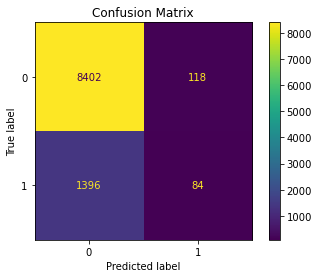

In [12]:
from sklearn.metrics import plot_confusion_matrix

# Assuming you have trained your logistic regression model and made predictions on a test dataset
plot_confusion_matrix(rf_model, X_test, y_test)  # Replace model, X_test, and y_test with your actual objects


plt.title("Confusion Matrix")
plt.show()


In [13]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall scores
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the scores
print("Precision:", precision)
print("Recall:", recall)


Precision: 0.6739130434782609
Recall: 0.020945945945945947


In [14]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report

# Create a logistic regression model with cross-validation
lr_model = LogisticRegressionCV(cv=5, class_weight='balanced')

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Print classification report with precision, recall, and F1-score
print(classification_report(y_test, y_pred))


/Users/olumide/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/olumide/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/olumide/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/olumide/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

              precision    recall  f1-score   support

           0       0.90      0.60      0.72      8520
           1       0.21      0.60      0.31      1480

    accuracy                           0.60     10000
   macro avg       0.55      0.60      0.51     10000
weighted avg       0.79      0.60      0.66     10000



In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5, 10]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.0
Recall: 0.0


/Users/olumide/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


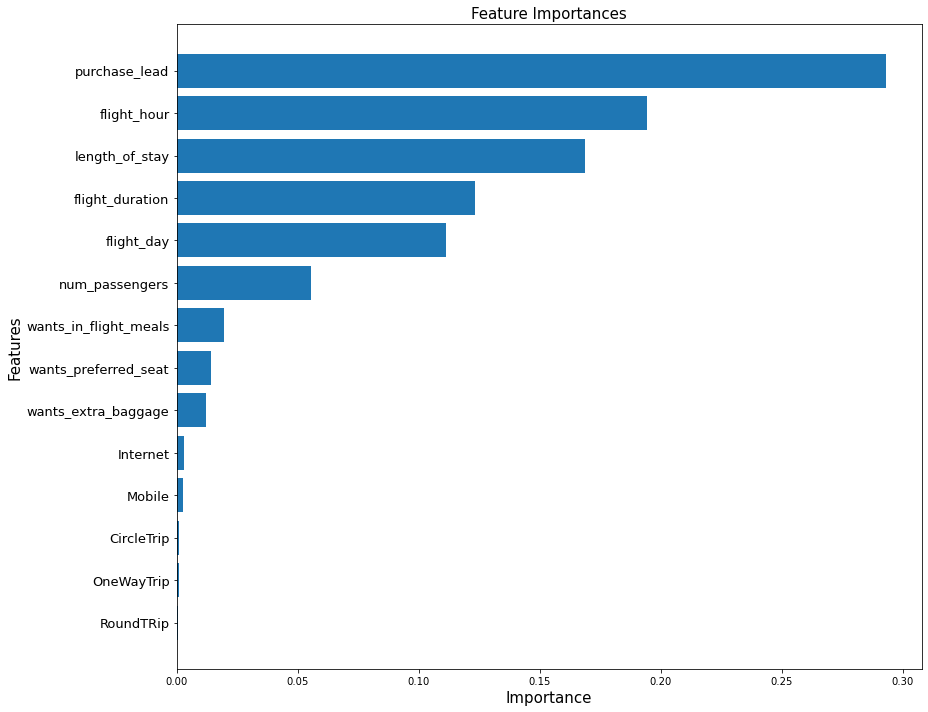

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the trained random forest model
importances = rf_model.feature_importances_

# Get the names of the features
feature_names = X.columns

# Sort feature importances in ascending order
indices = np.argsort(importances)

# Plot feature importances
plt.figure(figsize=(13, 10))  # Adjust the figure size as needed
plt.barh(range(len(importances)), importances[indices])
plt.yticks(range(len(importances)), feature_names[indices], fontsize=13)  # Set feature names as y-axis ticks
plt.xlabel('Importance', {'fontsize':15})
plt.ylabel('Features', {'fontsize':15})
plt.title('Feature Importances', {'fontsize':15})
plt.tight_layout()
plt.show();

